# Credit Card Default Prediction

***

![](A6149B5D-7DC5-44DF-B26A-3528C2333A0A.jpeg "src:pinterest")



|Project        | Credit card default prediction|
|---------------|-------------------------------|
|Domain         |Banking                        |
|Technologies   |Machine Learning               |




## Contents

- [Problem Statement](#problem-statement)

    - [About dataset](#about-dataset)

    - [Import required python packages](#import-libraries)

    - [Import data](#load-data)

    - [Data information](#data-information)

- [Data Cleaning](#data-cleaning)

    - [Rename columns](#renaming-cols)

    - [Re-Index columns](#re-indexing-columns)

    - [Check duplicate](#check-duplicate)

    - [Quick analysis](#quick-report)

- [Exploratory Data Analysis](#eda)

    - [Statistical description](#statistical-description)

    - [Corelation Matrix](#corelation-matrix)

    - [Outliers in data](#check-outlier)

    - [Credit Limit](#credit-limit)

    - [Payment Default](#num-defaulters)

    - [Age](#age)

    - [Gender](#gender)

    - [Marital Status](#marriage)

    - [Credit limit](#credit-limit)

    - [Repayment Status](#re-payment-status)

    - [Bill statement](#bill-statement)

    - [Previous payment amount](#previous-payment-amount)

- [Data Preprocessing](#data-preprocessing)

    - [Clean noise data](#clean-noise)

    - [Random sampling](#random-sampling)

    - [Split and Scale](#split-and-scale)

- [Machine Learning](#machine-learning)

    - [Decision Tree classifier](#decision-tree-classifier)

    - [Random Forest Classifier](#random-forest-classifier)

    - [Precision Recall Tradeoff](#precision-recall-tradeoff)


- [Conclusion](#conclusion)

<a id="problem-statement"></a>

## Problem Statement



Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. The biggest threats faced by commercial banks is the risk prediction of credit clients.
The goal is to predict the probability of credit default based on credit card owner's characteristics and payment history.

<a id='about-dataset'></a>

### About Dataset:

##### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

##### The dataset has 25 fields:


`ID`: ID of each client

`LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and
family/supplementary credit

`SEX`: Gender (1=male, 2=female)

`EDUCATION`: (1=graduate school, 2=university, 3=high school, 4=others,
5=unknown, 6=unknown)

`MARRIAGE`: Marital status (1=married, 2=single, 3=others)

`AGE`: Age in years

`PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight
months, 9=payment delay for nine months and above)

`PAY_2`: Repayment status in August, 2005 (scale same as above)

`PAY_3`: Repayment status in July, 2005 (scale same as above)

`PAY_4`: Repayment status in June, 2005 (scale same as above)

`PAY_5`: Repayment status in May, 2005 (scale same as above)

`PAY_6`: Repayment status in April, 2005 (scale same as above)

`BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)

`BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)

`BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)

`BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)

`BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)

`BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)

`PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)

`PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)

`PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)

`PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)

`PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)

`PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)

`default.payment.next.month`: Default payment (1=yes, 0=no)

<a id='import-libraries'></a>

### Import Libraries

- For this project we need Python packages like

    - Pandas, Numpy : For data analysis

    - Matplotlib, Seaborn : For visualization

    - Scikit-learn, Imblearn : For machine learning

    - Ipython, SweetViz, Warning, PyJanitor, and Klib: For short analysis, formatting notebook, and better cleaning purposes.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
import warnings
import sweetviz as sv
import IPython
import klib
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

%matplotlib inline
pd.set_option('display.max_rows', None, 'display.max_columns', None)
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.rcParams['figure.dpi'] = 140
warnings.filterwarnings('ignore')

<a id='load-data'></a>

### Import data 

In [3]:
# import data
data = pd.read_csv('UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# shape
data.shape

(30000, 25)

<a id='data-information'></a>

### Information

- To generate a overview information of data with pandas `info()` 

- This can help to understand:
    - Number of rows in each field.

    - Number of fields.

    - Data type in each field.

    - Value count, can find missing values, if any

    - Memory usage while processing the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- There's no categorical or object type values in the data, either they are float64 or int64 type.

- There are 30,000 rows and 25 columns in the dataset.

- Dataset uses more than 5 MB memory

<a id='data-cleaning'></a>

## Data Cleaning

- The column names in the dataset are not explaining very much about their content. They are even unordered.

- We have to rename the column names and reindex them to a better structure.

- Will check missing values, duplicate values and handle them as per need.

- Also need to remove the ID column after checking the duplicate values, as this column is less significance for analysis and machine learning.


<a id='renaming-cols'></a>

### Renaming Columns

- Dataset has mainly 3 types of balance statement apart from customer detail like age, marital status, education, and balance limit.

- Renaming column names:

|Old Names      | New Names     |Characteristic     |
|---------------|---------------|-------------------|
|LIMIT_BAL      | credit_limit  |Credit amount (NT $)|
|PAY_0          |re_sep         |Repayment status in September, 2005|
|PAY_2|re_aug|Repayment status in August, 2005|
|PAY_3|re_jul|Repayment status in July, 2005|
|PAY_4|re_jun|Repayment status in June, 2005|
|PAY_5|re_may|Repayment status in May, 2005|
|PAY_6|re_apr|Repayment status in April, 2005|
|BILL_AMT1|bill_sep|Bill amount in September, 2005|
|BILL_AMT2|bill_aug|Bill amount in August, 2005|
|BILL_AMT3|bill_jul|Bill amount in July, 2005|
|BILL_AMT4|bill_jun|Bill amount in June, 2005|
|BILL_AMT5|bill_may|Bill amount in May, 2005|
|BILL_AMT6|bill_apr|Bill amount in April, 2005|
|PAY_AMT1|pre_sep|Amount of previous payment in September, 2005|
|PAY_AMT2|pre_aug|Amount of previous payment in August, 2005|
|PAY_AMT3|pre_jul|Amount of previous payment in July, 2005|
|PAY_AMT4|pre_jun|Amount of previous payment in Jun, 2005|
|PAY_AMT5|pre_may|Amount of previous payment in May, 2005|
|PAY_AMT6|pre_apr|Amount of previous payment in April, 2005|
|DEFAULT.PAYMENT.NEXT.MONTH|current_default|Default payment: 1= Yes, 0 = No|

In [6]:
data = janitor.clean_names(data)

In [7]:
# Rename columns:
# re: repayment status, pre: amt of previous payment, bill: bill statement

new_col_names = {
    'limit_bal':'credit_limit',
    'pay_0':'re_sep', 
    'pay_2':'re_aug', 
    'pay_3':'re_jul', 
    'pay_4':'re_jun', 
    'pay_5':'re_may', 
    'pay_6':'re_apr',
    'pay_amt1':'pre_sep',
    'pay_amt2':'pre_aug',
    'pay_amt3':'pre_jul',
    'pay_amt4':'pre_jun',
    'pay_amt5':'pre_may',
    'pay_amt6':'pre_apr',
    'bill_amt1':'bill_sep', 
    'bill_amt2':'bill_aug', 
    'bill_amt3':'bill_jul', 
    'bill_amt4':'bill_jun', 
    'bill_amt5':'bill_may',
    'bill_amt6':'bill_apr',
    'default_payment_next_month':'current_default'
}

data = data.rename_columns(new_col_names)

In [8]:
data.columns

Index(['id', 'credit_limit', 'sex', 'education', 'marriage', 'age', 're_sep',
       're_aug', 're_jul', 're_jun', 're_may', 're_apr', 'bill_sep',
       'bill_aug', 'bill_jul', 'bill_jun', 'bill_may', 'bill_apr', 'pre_sep',
       'pre_aug', 'pre_jul', 'pre_jun', 'pre_may', 'pre_apr',
       'current_default'],
      dtype='object')

<a id="re-indexing-cols"></a>

### Re-Indexing columns

- Columns are not indexed properly, to understand the data better by staring the dataset, we need to keep the columns in a ordered manner.

- The first column should be ID, followed by age, sex, education, marriage, then credit limit, followed by repayment columns, then bill amount, followed by previous payment statement, and at the end default values.

In [9]:
col_reset_order = ["id", "age", "sex", "education", "marriage", "credit_limit", "re_apr", 're_may', 're_jun', 're_jul', 're_aug', 're_sep', \
    'bill_apr', 'bill_may', 'bill_jun', 'bill_jul', 'bill_aug', 'bill_sep', \
        'pre_apr', 'pre_may', 'pre_jun', 'pre_jul', 'pre_aug', 'pre_sep', 'current_default']

data = data.reindex(columns=col_reset_order)

<a id='check-duplicate'></a>

### Check duplicate rows

- In the information part, we see there's no null values in the data.

- However, it's good have a sanity check.

In [10]:
data.isnull().sum()

id                 0
age                0
sex                0
education          0
marriage           0
credit_limit       0
re_apr             0
re_may             0
re_jun             0
re_jul             0
re_aug             0
re_sep             0
bill_apr           0
bill_may           0
bill_jun           0
bill_jul           0
bill_aug           0
bill_sep           0
pre_apr            0
pre_may            0
pre_jun            0
pre_jul            0
pre_aug            0
pre_sep            0
current_default    0
dtype: int64

In [11]:
# Check missing values
klib.missingval_plot(data)

No missing values found in the dataset.


In [12]:
# Duplicate values
data.duplicated().any()

False

- No duplicate and missing values in the dataset.

<a id='quick-report'></a>

### Quick report

In [13]:
# Quick Report 
analyze_report = sv.analyze(data)
analyze_report.show_html('default_analysis_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report default_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


- A short report has been generate and stored. 

- Open the `default_analysis_report.html` to view the quick analysis report.

In [14]:
# Save the cleaned dataset
data.to_csv('credit_data_cleaned.csv', index=False)
print("The cleaned data has been saved..../")

The cleaned data has been saved..../


<a id='eda'></a>

## Exploratory Data Analysis

- In EDA, we will do data profiling by analyzing all the fields individually as well as by comparing with each other.

- To reduce memory use, we will analyze the bill statement, repayment status, and previous payment statements by extracting separate DataFrames.

In [15]:
# import the cleaned dataset
data = pd.read_csv('credit_data_cleaned.csv')

data.head()

,id,age,sex,education,marriage,credit_limit,re_apr,re_may,re_jun,re_jul,re_aug,re_sep,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep,pre_apr,pre_may,pre_jun,pre_jul,pre_aug,pre_sep,current_default
0,1,24,2,2,1,20000.0,-2,-2,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,2,26,2,2,2,120000.0,2,0,0,0,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,3,34,2,2,2,90000.0,0,0,0,0,0,0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,4,37,2,2,1,50000.0,0,0,0,0,0,0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,5,57,1,2,1,50000.0,0,0,0,-1,0,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


<a id='corelation-matrix'></a>

### Corelation Matrix

- Pearson corelation of fields with each other.

In [16]:
# corelation

klib.corr_mat(data)

,id,age,sex,education,marriage,credit_limit,re_apr,re_may,re_jun,re_jul,re_aug,re_sep,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep,pre_apr,pre_may,pre_jun,pre_jul,pre_aug,pre_sep,current_default
id,1.00,0.02,0.02,0.04,-0.03,0.03,-0.02,-0.02,-0.00,-0.02,-0.01,-0.03,0.02,0.02,0.04,0.02,0.02,0.02,0.00,0.00,0.01,0.04,0.01,0.01,-0.01
age,0.02,1.00,-0.09,0.18,-0.41,0.14,-0.05,-0.05,-0.05,-0.05,-0.05,-0.04,0.05,0.05,0.05,0.05,0.05,0.06,0.02,0.02,0.02,0.03,0.02,0.03,0.01
sex,0.02,-0.09,1.00,0.01,-0.03,0.02,-0.04,-0.06,-0.06,-0.07,-0.07,-0.06,-0.02,-0.02,-0.02,-0.02,-0.03,-0.03,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.04
education,0.04,0.18,0.01,1.00,-0.14,-0.22,0.08,0.10,0.11,0.11,0.12,0.11,-0.01,-0.01,-0.00,0.01,0.02,0.02,-0.04,-0.04,-0.04,-0.04,-0.03,-0.04,0.03
marriage,-0.03,-0.41,-0.03,-0.14,1.00,-0.11,0.03,0.04,0.03,0.03,0.02,0.02,-0.02,-0.03,-0.02,-0.02,-0.02,-0.02,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,-0.02
credit_limit,0.03,0.14,0.02,-0.22,-0.11,1.00,-0.24,-0.25,-0.27,-0.29,-0.30,-0.27,0.29,0.30,0.29,0.28,0.28,0.29,0.22,0.22,0.20,0.21,0.18,0.20,-0.15
re_apr,-0.02,-0.05,-0.04,0.08,0.03,-0.24,1.00,0.82,0.72,0.63,0.58,0.47,0.29,0.29,0.27,0.24,0.23,0.21,-0.03,-0.05,0.02,0.01,-0.01,-0.00,0.19
re_may,-0.02,-0.05,-0.06,0.10,0.04,-0.25,0.82,1.00,0.82,0.69,0.62,0.51,0.26,0.27,0.27,0.24,0.23,0.21,-0.02,-0.03,-0.06,0.01,-0.00,-0.01,0.20
re_jun,-0.00,-0.05,-0.06,0.11,0.03,-0.27,0.72,0.82,1.00,0.78,0.66,0.54,0.24,0.24,0.25,0.24,0.23,0.20,-0.03,-0.03,-0.04,-0.07,-0.00,-0.01,0.22
re_jul,-0.02,-0.05,-0.07,0.11,0.03,-0.29,0.63,0.69,0.78,1.00,0.77,0.57,0.22,0.23,0.23,0.23,0.24,0.21,-0.04,-0.04,-0.05,-0.05,-0.07,0.00,0.24


- Credit limit has positive corelation with monthly previous payment history, bill amount and age.


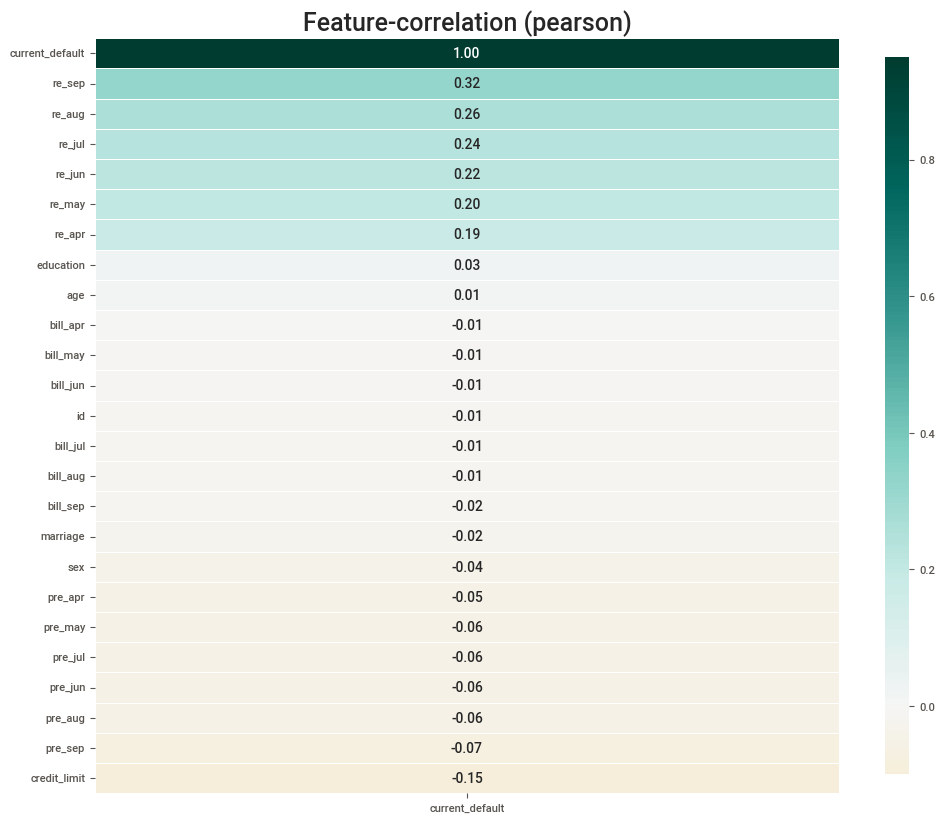

In [17]:
klib.corr_plot(data=data, target= data.current_default);

- Current default has positive corelation with repayment status.

<a id='statistical-description'></a>

### Statistical description

- Statistical description can tell us about the distribution of data in a tabular format.

- From there, we can check min value, max value, median values, and distribution of data along the columns.

In [18]:
# Statistical description
data.describe()

,id,age,sex,education,marriage,credit_limit,re_apr,re_may,re_jun,re_jul,re_aug,re_sep,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep,pre_apr,pre_may,pre_jun,pre_jul,pre_aug,pre_sep,current_default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,3.000000e+04,30000.000000,30000.000000
mean,15000.500000,35.485500,1.603733,1.853133,1.551867,167484.322667,-0.291100,-0.266200,-0.220667,-0.166200,-0.133767,-0.016700,38871.760400,40311.400967,43262.948967,4.701315e+04,49179.075167,51223.330900,5215.502567,4799.387633,4826.076867,5225.68150,5.921163e+03,5663.580500,0.221200
std,8660.398374,9.217904,0.489129,0.790349,0.521970,129747.661567,1.149988,1.133187,1.169139,1.196868,1.197186,1.123802,59554.107537,60797.155770,64332.856134,6.934939e+04,71173.768783,73635.860576,17777.465775,15278.305679,15666.159744,17606.96147,2.304087e+04,16563.280354,0.415062
min,1.000000,21.000000,1.000000,0.000000,0.000000,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-339603.000000,-81334.000000,-170000.000000,-1.572640e+05,-69777.000000,-165580.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000
25%,7500.750000,28.000000,1.000000,1.000000,1.000000,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1256.000000,1763.000000,2326.750000,2.666250e+03,2984.750000,3558.750000,117.750000,252.500000,296.000000,390.00000,8.330000e+02,1000.000000,0.000000
50%,15000.500000,34.000000,2.000000,2.000000,2.000000,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17071.000000,18104.500000,19052.000000,2.008850e+04,21200.000000,22381.500000,1500.000000,1500.000000,1500.000000,1800.00000,2.009000e+03,2100.000000,0.000000
75%,22500.250000,41.000000,2.000000,2.000000,2.000000,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49198.250000,50190.500000,54506.000000,6.016475e+04,64006.250000,67091.000000,4000.000000,4031.500000,4013.250000,4505.00000,5.000000e+03,5006.000000,0.000000
max,30000.000000,79.000000,2.000000,6.000000,3.000000,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,961664.000000,927171.000000,891586.000000,1.664089e+06,983931.000000,964511.000000,528666.000000,426529.000000,621000.000000,896040.00000,1.684259e+06,873552.000000,1.000000


#### Inferences from statistical distribution:

- Age has a minimum value of 21 and maximum values of 79, whereas the median is 24. This means that the customer ranges from younger 21 to older 80 years. But most of the creditors are of young age.

- In education column, the minimum value is 0, where in the description the value is 1. There's some erroneous input in this column. 25 percentile people in the dataset has finished or in Graduate school, whereas, 75 percentile consumers are in or completed University level education.

- Credit limit ranges in between 1k to 1M NT $. The median credit limit is 2 lakh 40 thousand. The distribution is long tailed distribution.

- Repayment status columns has also some erroneous values, as the minimum value in description is -1, where as maximum is 9. But, in the dataset, the minimum value is -2, and maximum is 8. Maximum value doesn't suspicious, as most of creditors won't wish to keep the payment due for a long time. The negative values need to be further checked. 

- The median value, even up to 75 percentile, the value is 0, which is not mentioned in the description as well. Need to check further. However, 25 percentile of total creditors are paying their credit on time.

- The bill statement is every month ranges from -ve to +ve. Where as the negative value is not too negative than the positive values. The maximum value is too high from the median value. There must be some non-normal distribution.

- Previous payment amount columns also follow the same pattern as bill statement, except there's no negative value. Most of people are paying some amount.

- 75 percentile people has not kept any credit due.

### Outlier detection:

- Statistical description indicates towards presence of outliers in the dataset.

- Very few creditors has credited higher amount, whereas more of creditors has credited very little amount. This evidences the presence of outliers, as the higher the credit amount, the more the monthly payment.

In [19]:
len(data.columns)

25

In [20]:
# divide the dataset into features and targets
features = data.iloc[:, 1:24]
target = data['current_default']

In [21]:
features.head()

,age,sex,education,marriage,credit_limit,re_apr,re_may,re_jun,re_jul,re_aug,re_sep,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep,pre_apr,pre_may,pre_jun,pre_jul,pre_aug,pre_sep
0,24,2,2,1,20000.0,-2,-2,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0
1,26,2,2,2,120000.0,2,0,0,0,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0
2,34,2,2,2,90000.0,0,0,0,0,0,0,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0
3,37,2,2,1,50000.0,0,0,0,0,0,0,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0
4,57,1,2,1,50000.0,0,0,0,-1,0,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0


<Figure size 2000x400 with 0 Axes>

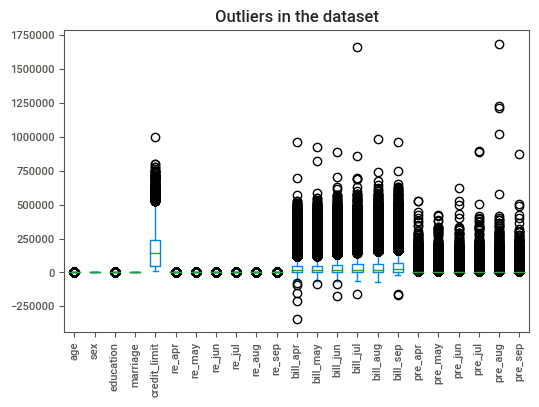

In [22]:
plt.figure(figsize=(20,4))
features.plot(kind='box')
plt.xticks(rotation=90)
plt.title("Outliers in the dataset")
plt.show();

- As we have discussed above, there's outliers in the dataset. 

- We can't delete these outliers as they are important for the study.

- However, we can scale the values in pre-processing phase.


<a id='defaulter-count'></a>

### Current Default

- Count of defaulters and non-defaulters.

In [23]:
data.current_default.value_counts()

0    23364
1     6636
Name: current_default, dtype: int64

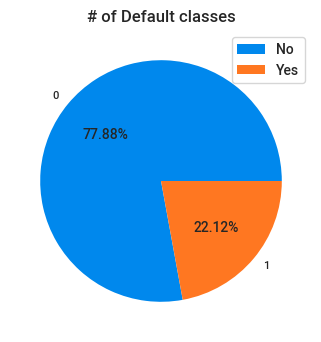

In [24]:
data.current_default.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.ylabel('')
plt.title("# of Default classes")
plt.legend(labels=['No','Yes']);

- Only 22% creditors which is 6636 out of 30000 creditors have defaulted their payment.

### Age

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


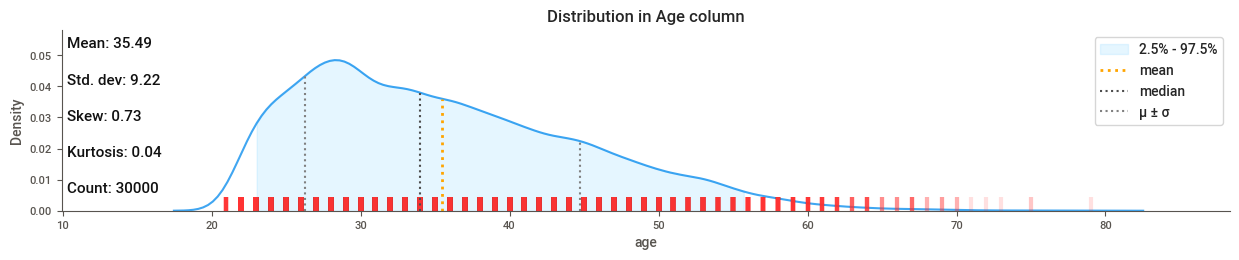

In [25]:
klib.dist_plot(features.age)
plt.title("Distribution in Age column")
plt.show()

- Most of creditors are of young age group, and medium age group (30+).

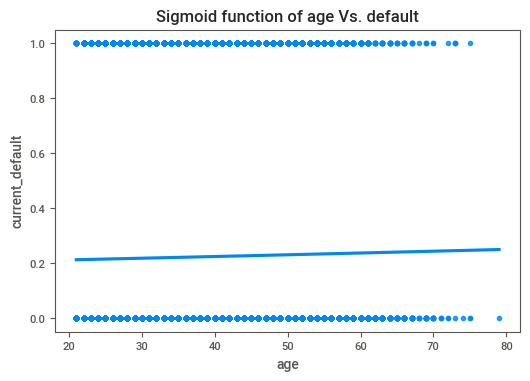

In [26]:
sns.regplot(data=data, x='age', y='current_default', logistic=True, ci=None)
plt.title("Sigmoid function of age Vs. default")
plt.show()

- This plot is not clearly show much of relations. 

- Or, we can say that age doesn't make any relation with the defaulters.

### Sex

1: Male

2: Female

In [27]:
features.sex.value_counts()

2    18112
1    11888
Name: sex, dtype: int64

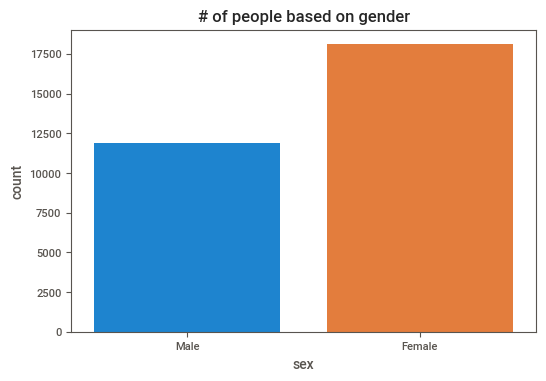

In [28]:
sns.countplot(data=data, x='sex')
plt.xticks([0,1],['Male','Female'])
plt.title("# of people based on gender");

In [29]:
# % more female

(data.sex.value_counts()[2] - data.sex.value_counts()[1])/data.shape[0] * 100

20.746666666666666

- There are more female creditors than male.

- 20.74% less male creditors in comparison to female.

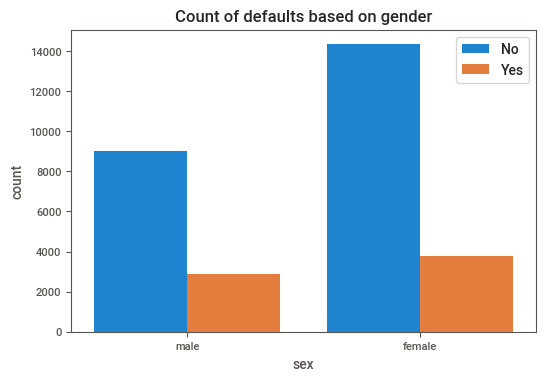

In [30]:
sns.countplot(data=data, x='sex', hue='current_default')
plt.xticks([0,1],['male', 'female'])
plt.legend(labels=['No', 'Yes'])
plt.title("Count of defaults based on gender");

- Females number is high among creditors, and they have more number of defaulters than male as well.

In [31]:
# male defaulters 
total_male = data.loc[data['sex']==1]
num_male_defaulters = data.loc[(data['sex']==1) & (data['current_default'] == 1)]

# female defaulters
total_female = data.loc[data['sex']==1]
num_female_defaulters = data.loc[(data['sex']==2) & (data['current_default'] == 1)]

# percent of male and female defaulters
percent_of_male = num_male_defaulters.shape[0]/total_male.shape[0] * 100
percent_of_female = num_female_defaulters.shape[0]/total_female.shape[0] * 100

percent_of_total_male_default = num_male_defaulters.shape[0]/data.shape[0] * 100
percent_of_total_female_defalt = num_female_defaulters.shape[0]/data.shape[0] * 100

print("Number of defaulters from male group: {}".format(num_male_defaulters.shape[0]))
print("Number of defaulters from female group: {}".format(num_female_defaulters.shape[0]))
print("")
print("% of defaulters from male group with respec to total male creditors: {:.2f}%".format(percent_of_male))
print("% of defaulters from female group with respect to total female creditors: {:.2f}%".format(percent_of_female))
print("")
print("% of defaulters from male group out of total creditors: {:.2f}%".format(percent_of_total_male_default))
print("% of defaulters from female group out of total creditors: {:.2f}%".format(percent_of_total_female_defalt))

Number of defaulters from male group: 2873
Number of defaulters from female group: 3763

% of defaulters from male group with respec to total male creditors: 24.17%
% of defaulters from female group with respect to total female creditors: 31.65%

% of defaulters from male group out of total creditors: 9.58%
% of defaulters from female group out of total creditors: 12.54%


- Out of total creditors, 12.54% female and 9.58% male are defaulters.

- The above calculations can be achieved using crosstab method of pandas, which is more easy and can be visualize using mosaic plot.

In [32]:
# gender Vs Payment Default
gender_vs_payment_default = data[['sex', 'current_default']]
gender_vs_payment_default.sex = gender_vs_payment_default.sex.map({2:'female', 1:'male'})
gender_vs_payment_default.current_default = gender_vs_payment_default.current_default.map({0:'no-default', 1:'default'})


gender_crosstable = pd.crosstab(gender_vs_payment_default.sex, gender_vs_payment_default.current_default)
gender_crosstable

current_default,default,no-default
sex,,
female,3763,14349
male,2873,9015


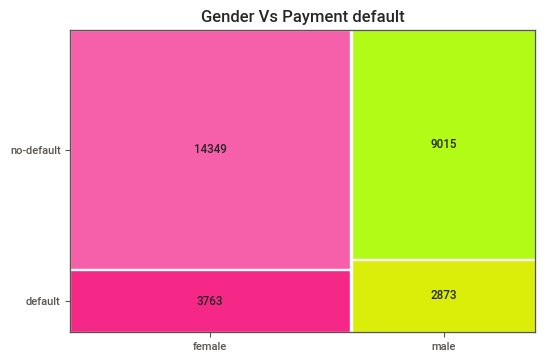

In [33]:
props={}
props[('female','no-default')]={'facecolor':'#f660ab', 'edgecolor':'white'}
props[('female','default')]={'facecolor':'#f52887', 'edgecolor':'white'}
props[('male','no-default')]={'facecolor':'#b1fb17','edgecolor':'white'}
props[('male','default')]= {'facecolor':'#daee0a','edgecolor':'white'}

labelizer = lambda k: {('female', 'default'):3763, ('male', 'default'):2873, ('female','no-default'):14349, ('male', 'no-default'):9015}[k]

mosaic(
    gender_vs_payment_default, 
    ['sex', 'current_default'], 
    labelizer=labelizer,title='Gender Vs Payment default',
    properties=props
);

- Don't get confused by the higher volume in male defaulter side.

- The area under male defaulter box is lower than area under female defaulter box.

<a id='education'></a>

### Education

1=graduate school, 

2=university, 

3=high school, 

4=others,

5=unknown, 

6=unknown

In [34]:
features.education.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

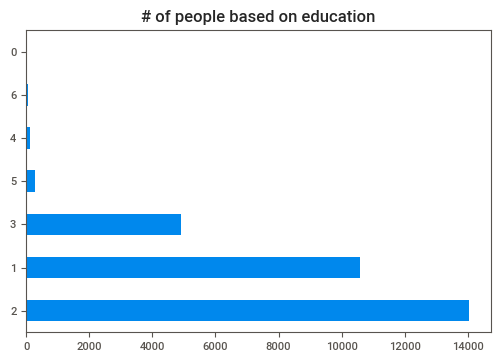

In [35]:
features.education.value_counts().plot(kind='barh')
plt.title("# of people based on education");

- There are actual 7 classes of education.

- 5,6 are unknown type whereas 4 is others and 0 is never mentioned in the description.

- The value of 6 will be reset to 5 as well as 0 will stay as it is.

In [36]:
# Education
data.education = data.education.replace({6:5})

In [37]:
pd.crosstab(data['education'], data['current_default'])

current_default,0,1
education,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,305,26


- University graduates has taken more number of credit followed by graduates.

In [38]:
# Education wise defaulters
data.groupby(['sex', 'education', 'current_default']).current_default.count().to_frame(name='total')
credit_by_gender_n_education = data.groupby(['sex', 'education', 'current_default']).current_default.count().to_frame(name='total').reset_index()
credit_by_gender_n_education_df = credit_by_gender_n_education[credit_by_gender_n_education['current_default']==1]
credit_by_gender_n_education_df['percent'] = round((credit_by_gender_n_education_df.total/data.shape[0])*100, 2)
credit_by_gender_n_education_df

,sex,education,current_default,total,percent
2,1,1,1,906,3.02
4,1,2,1,1408,4.69
6,1,3,1,545,1.82
8,1,4,1,4,0.01
10,1,5,1,10,0.03
13,2,1,1,1130,3.77
15,2,2,1,1922,6.41
17,2,3,1,692,2.31
19,2,4,1,3,0.01
21,2,5,1,16,0.05


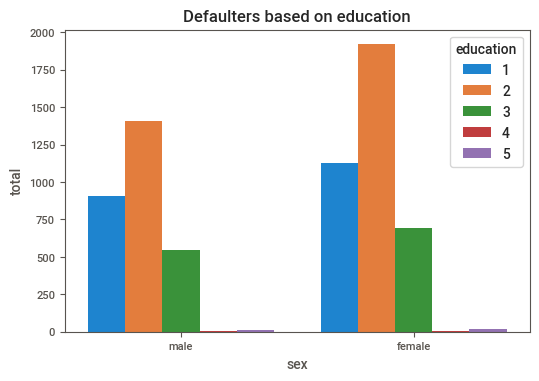

In [39]:

sns.barplot(data=credit_by_gender_n_education_df, x='sex', y='total', hue='education')
plt.title("Defaulters based on education")
plt.xticks([0,1],['male','female'])
plt.show()

- University graduates has taken more number of credit and have most defaulters. 

In [40]:
table_2 = pd.pivot_table(data, values='credit_limit', index=['education'], aggfunc=np.sum)
table_2

,credit_limit
education,
0,3.040000e+06
1,2.254140e+09
2,2.063286e+09
3,6.222477e+08
4,2.717000e+07
5,5.464600e+07


<a id='marriage'></a>

### Marriage

1 = Married

2 = Single

3 = Other

In [41]:
features.marriage.value_counts()

2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64

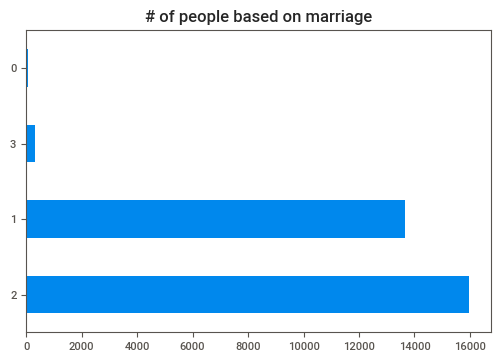

In [42]:
features.marriage.value_counts().plot(kind='barh')
plt.title("# of people based on marriage");

- Most creditors are singles followed by married.

- There's an additional category `0` in the data which is not mentioned in description.

- This 0 will be replaced with 3.

In [43]:

# Marriage 
data.marriage = data.marriage.replace({0:3})

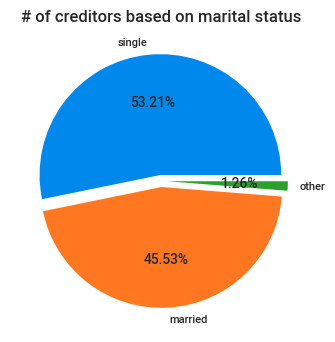

In [44]:
data.marriage.value_counts().plot(kind='pie', autopct="%.2f%%",labels=['single','married','other'], explode=(0.05, 0.05,0.05))
plt.ylabel('')
plt.title("# of creditors based on marital status");

- Singles are most number of creditors.

In [45]:
pd.pivot_table(data, values='credit_limit', index=['marriage'], columns=['sex'], aggfunc=np.sum)

sex,1,2
marriage,,
1,991596000.0,1.497086e+09
2,938337680.0,1.558650e+09
3,13990000.0,2.487000e+07


- Among male creditors, married people have made highest number of credit whereas, single females has highest number of credit.

In [46]:
gender_vs_marriage_default = data.groupby(['sex','marriage', 'current_default']).current_default.count().to_frame(name='total')
gender_vs_marriage_default

total
sex marriage current_default       
1   1        0                 3844
             1                 1346
    2        0                 5068
             1                 1485
    3        0                  103
             1                   42
2   1        0                 6609
             1                 1860
    2        0                 7555
             1                 1856
    3        0                  185
             1                   47

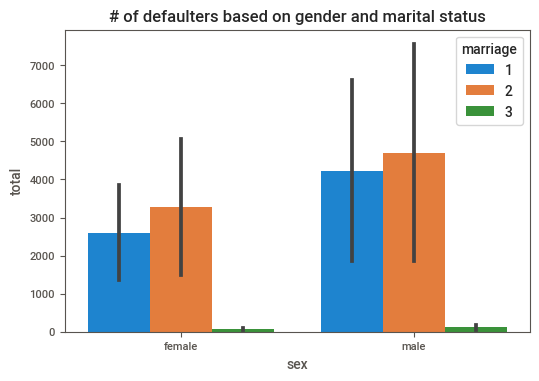

In [47]:
gender_vs_marriage_default_df = gender_vs_marriage_default.reset_index()

sns.barplot(data=gender_vs_marriage_default_df, x='sex',y='total', hue='marriage')
plt.xticks([1,0],['male','female'])
plt.title("# of defaulters based on gender and marital status");

- Bachelors are more defaulters.

<a id='credit-limit'></a>

### Credit limit

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


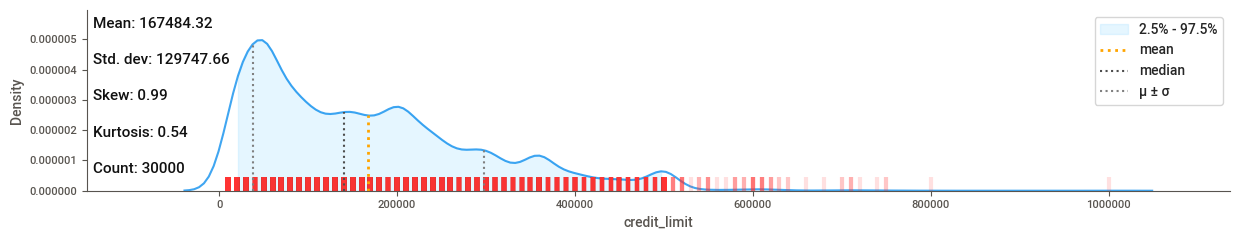

In [48]:
klib.dist_plot(features.credit_limit);

- Long tail distribution towards right side.

In [49]:
# Total credit limit
data.credit_limit.sum()

5024529680.0

In [50]:
table_1 = pd.pivot_table(data, values='credit_limit', index='sex', aggfunc=np.sum).reset_index()
table_1

,sex,credit_limit
0,1,1.943924e+09
1,2,3.080606e+09


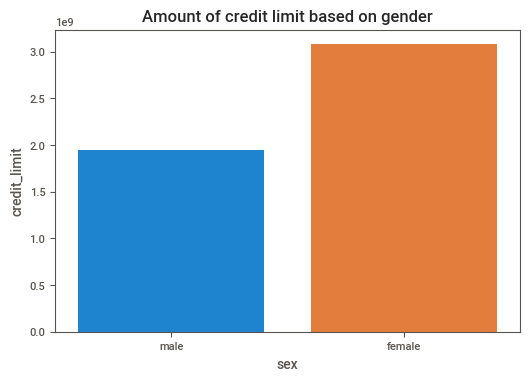

In [51]:
sns.barplot(data=table_1, x='sex', y='credit_limit')
plt.xticks([0,1],['male','female'])
plt.title("Amount of credit limit based on gender")
plt.show()

In [52]:
table_2 = pd.pivot_table(data, values='credit_limit', index=['education'], aggfunc=np.sum)
table_2

,credit_limit
education,
0,3.040000e+06
1,2.254140e+09
2,2.063286e+09
3,6.222477e+08
4,2.717000e+07
5,5.464600e+07


<a id='repayment-status'></a>

### Repayment Status

-1 = pay duly, 

1 = payment delay for one month, 

2 = payment delay for two months, 

3 = payment delay for three months,

.

.

. 

8 = payment delay for eight months, 

9 = payment delay for nine months and above

In [53]:
repayment_status = features.iloc[:,5:11]
repayment_status.head(10)

,re_apr,re_may,re_jun,re_jul,re_aug,re_sep
0,-2,-2,-1,-1,2,2
1,2,0,0,0,2,-1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,-1,0,-1
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,-1,0,0,-1,-1,0
8,0,0,0,2,0,0
9,-1,-1,-2,-2,-2,-2


In [54]:
repayment_status.re_apr.value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: re_apr, dtype: int64

In [55]:
repayment_status.re_may.value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: re_may, dtype: int64

In [56]:
repayment_april = features.re_apr.value_counts().to_frame(name='total').reset_index()
repayment_april = repayment_april.rename({'index':'april'}, axis=1)
repayment_april

,april,total
0,0,16286
1,-1,5740
2,-2,4895
3,2,2766
4,3,184
5,4,49
6,7,46
7,6,19
8,5,13
9,8,2


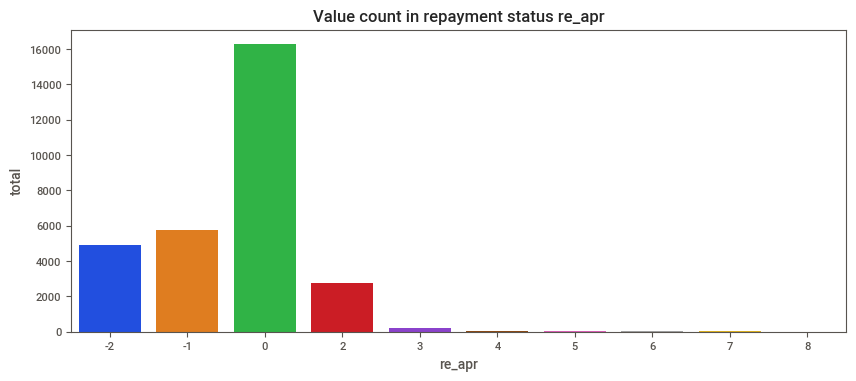

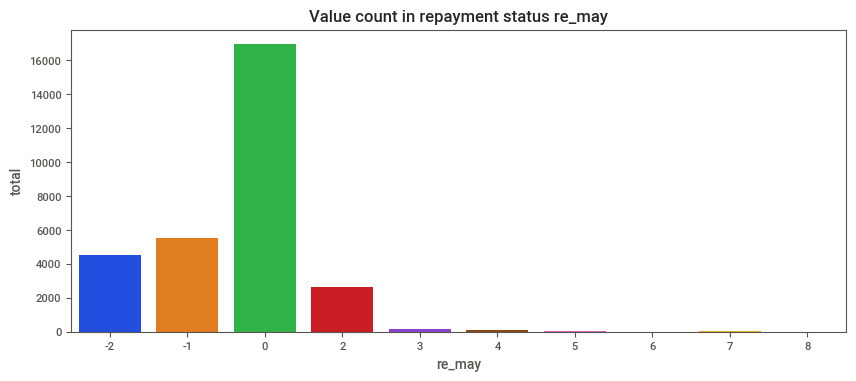

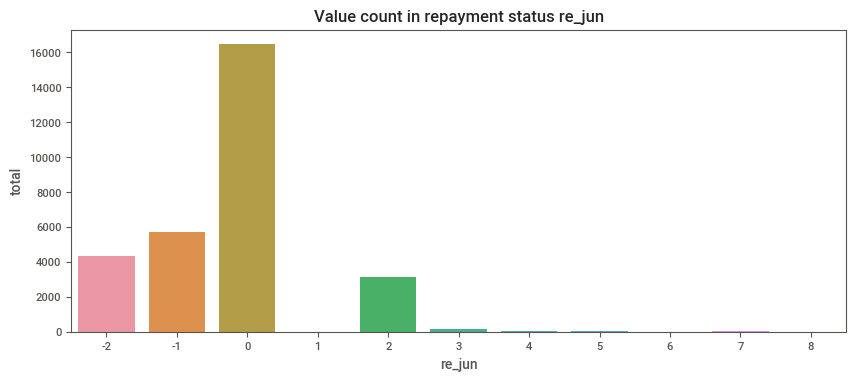

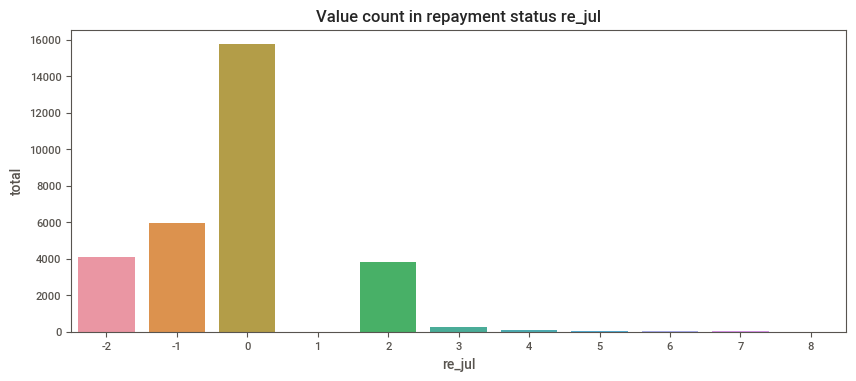

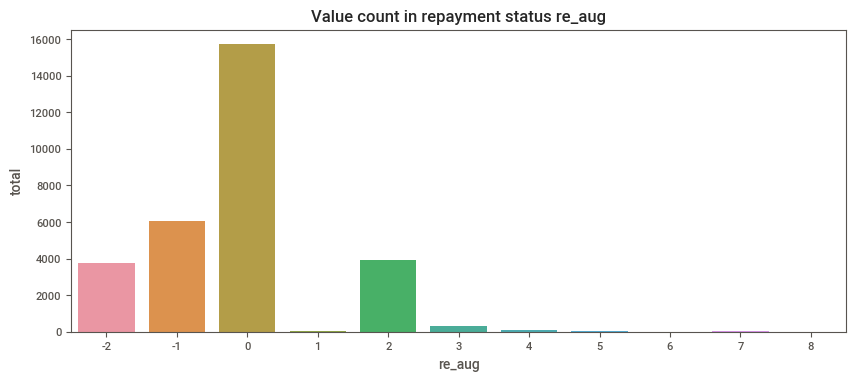

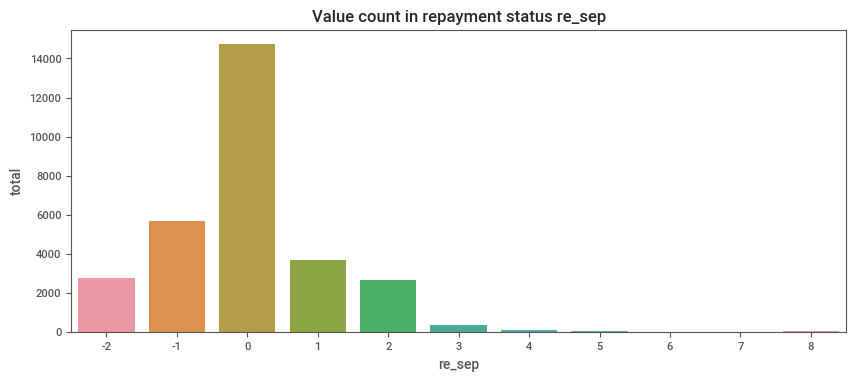

In [57]:
for column in repayment_status.columns:
    df = repayment_status[column].value_counts().to_frame(name='total').reset_index()
    df = df.rename({'index':column}, axis=1)
    plt.figure(figsize=(10,4))
    sns.set_palette('bright')
    sns.barplot(data=df, x=column, y='total')
    plt.title("Value count in repayment status {}".format(column))
    plt.show()

- There's no value 0 and -2 in the dataset, so they are more likely to be replaced with -1.

- Most creditors have paid their bill, as this also confirmed by the above pie plots in current default part.


In [58]:
bill_status = data.iloc[:,12:18]
bill_status.head()

,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep
0,0.0,0.0,0.0,689.0,3102.0,3913.0
1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0
2,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0
3,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0
4,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0


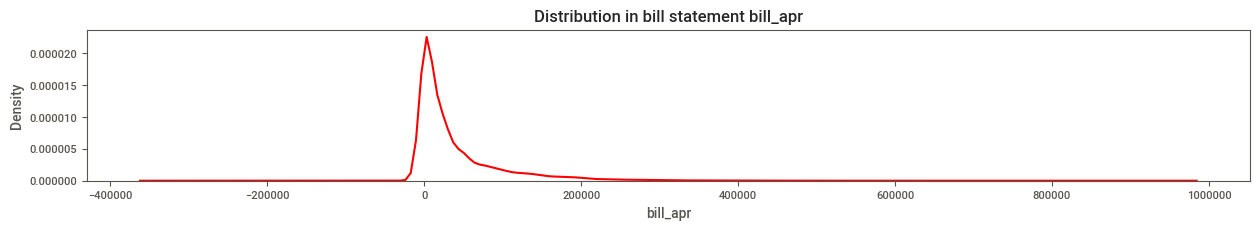

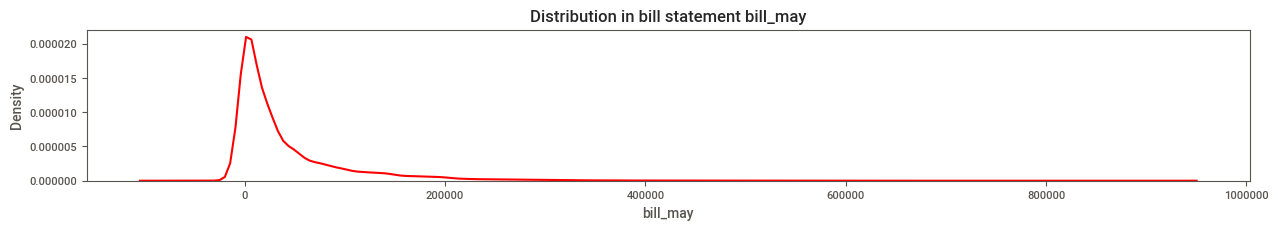

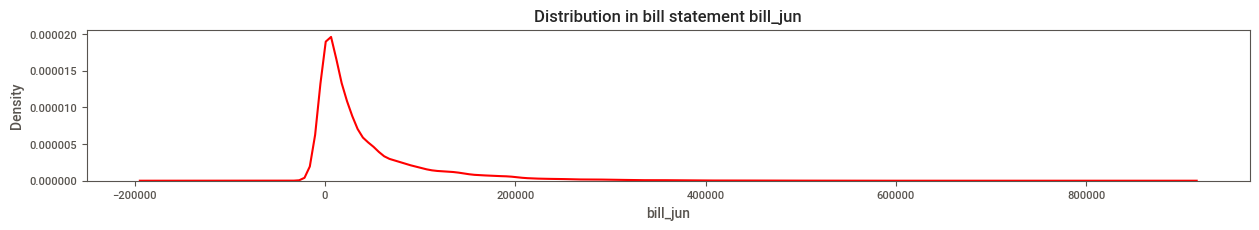

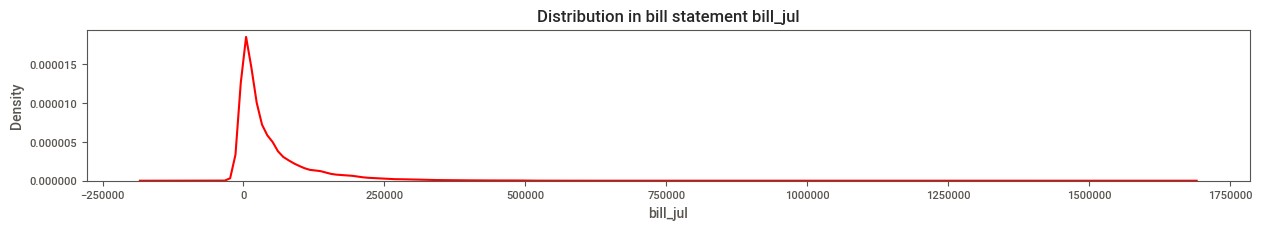

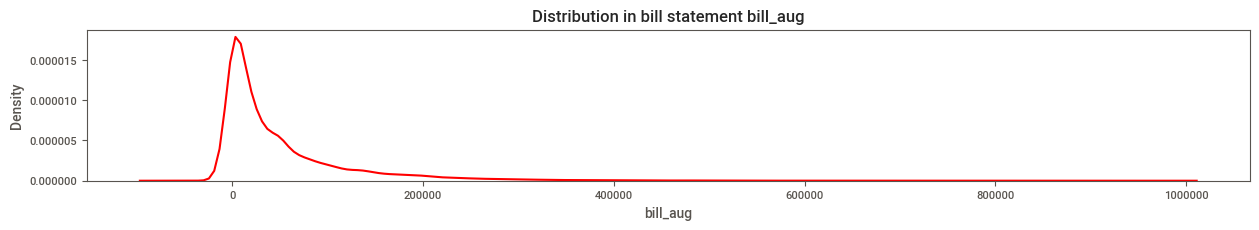

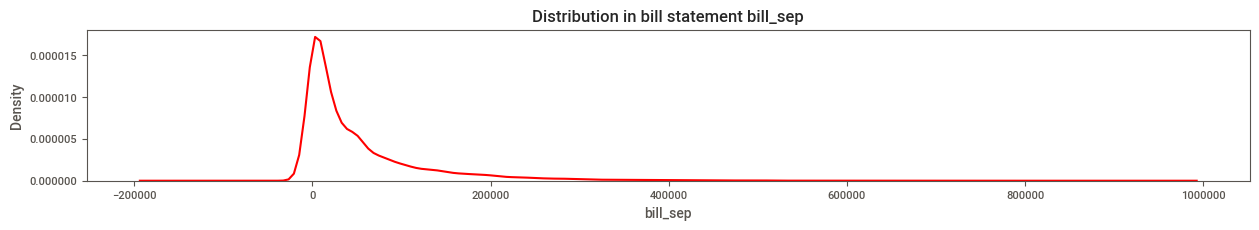

In [59]:
for column in bill_status.columns:
    plt.figure(figsize=(15,2))
    sns.kdeplot(bill_status[column], color='red')
    plt.title("Distribution in bill statement {}".format(column))
    plt.show()

- Long tailed distribution in bill_statement

- Most creditors have less than 10000 bill amount.

<a id='previous-payment-amount'></a>

### Previous payment amount

In [60]:
previous_payment_statement = data.iloc[:, 18:24]
previous_payment_statement.head()

,pre_apr,pre_may,pre_jun,pre_jul,pre_aug,pre_sep
0,0.0,0.0,0.0,0.0,689.0,0.0
1,2000.0,0.0,1000.0,1000.0,1000.0,0.0
2,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0
3,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0
4,679.0,689.0,9000.0,10000.0,36681.0,2000.0


In [61]:
previous_payment_statement_july = previous_payment_statement.loc[previous_payment_statement['pre_jul']<10000]
previous_payment_statement_july.shape

(26814, 6)

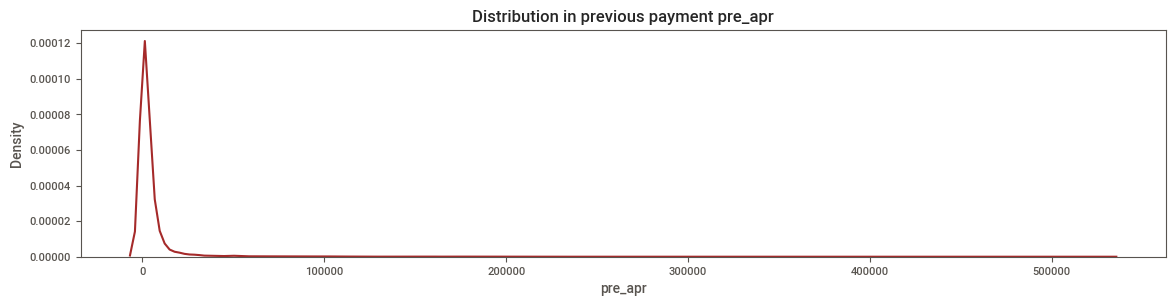

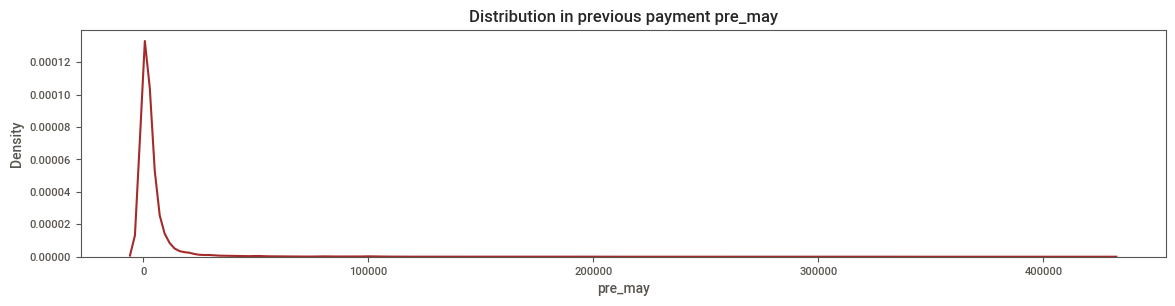

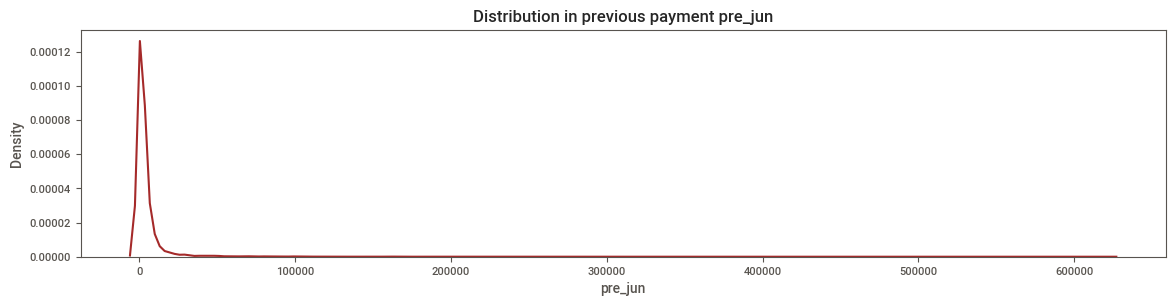

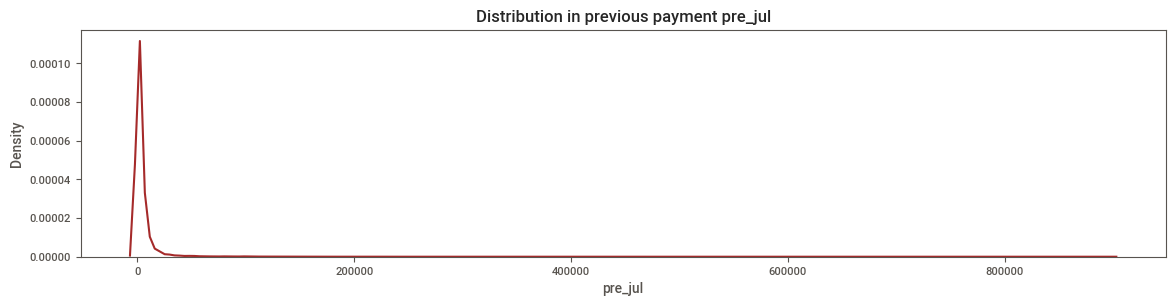

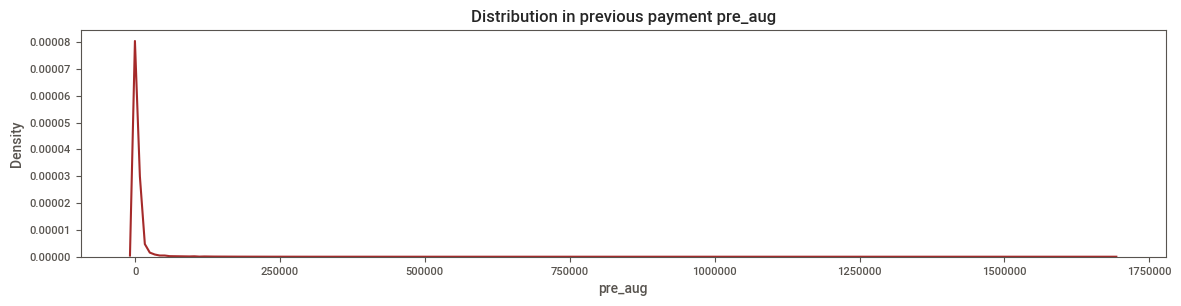

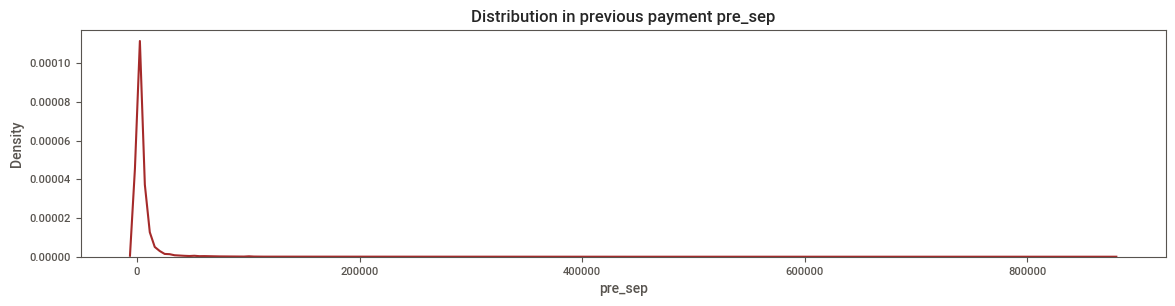

In [62]:
for column in previous_payment_statement.columns:
    plt.figure(figsize=(14,3))
    sns.kdeplot(previous_payment_statement[column], color='#A52A2A')
    plt.title("Distribution in previous payment {}".format(column))
    plt.show()

- previous payment amount is also following a long tailed distribution.

- This is because, most of consumers have not generated larger amt of bill, and also more number of creditors have paid their due.

<a id='machine-learning'></a>

## Machine Learning Model

- This dataset is an imbalanced dataset, and doesn't follow a normal distribution.

- To balance the data, we will use a mixed sampling technique i.e. SMOTETomek.

- As the dataset does not follow normal distribution and have multiple classes in some columns, parametric model like logistic regression, SVM, Naive Bayes, or KNN won't be a better fit for this problem. 

- To avoid inconsistency in model, we will fit a Decision Tree Classifier first, if that model goes underfitting, we will go for a boosting model as they can reduce bias. 

- If the DT classifier shows overfitting, our better choice is an ensemble model like Random Forest classifier.

- Before, that we need to process the data and scale it.

In [63]:
sns.set_style('white')

<a id='pre-processing'></a>

### Pre-processing

In [64]:
features.columns

Index(['age', 'sex', 'education', 'marriage', 'credit_limit', 're_apr',
       're_may', 're_jun', 're_jul', 're_aug', 're_sep', 'bill_apr',
       'bill_may', 'bill_jun', 'bill_jul', 'bill_aug', 'bill_sep', 'pre_apr',
       'pre_may', 'pre_jun', 'pre_jul', 'pre_aug', 'pre_sep'],
      dtype='object')

In [65]:
# Education
features.education = features.education.replace({6:5})

# Marriage 
features.marriage = features.marriage.replace({0:3})

In [66]:
for column in features.columns.to_list()[5:11]:
    features[column] = features[column].replace({0:-1, -2:-1})

In [67]:
features.head(10)

,age,sex,education,marriage,credit_limit,re_apr,re_may,re_jun,re_jul,re_aug,re_sep,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep,pre_apr,pre_may,pre_jun,pre_jul,pre_aug,pre_sep
0,24,2,2,1,20000.0,-1,-1,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0
1,26,2,2,2,120000.0,2,-1,-1,-1,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0
2,34,2,2,2,90000.0,-1,-1,-1,-1,-1,-1,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0
3,37,2,2,1,50000.0,-1,-1,-1,-1,-1,-1,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0
4,57,1,2,1,50000.0,-1,-1,-1,-1,-1,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0
5,37,1,1,2,50000.0,-1,-1,-1,-1,-1,-1,20024.0,19619.0,19394.0,57608.0,57069.0,64400.0,800.0,1000.0,1000.0,657.0,1815.0,2500.0
6,29,1,1,2,500000.0,-1,-1,-1,-1,-1,-1,473944.0,483003.0,542653.0,445007.0,412023.0,367965.0,13770.0,13750.0,20239.0,38000.0,40000.0,55000.0
7,23,2,2,2,100000.0,-1,-1,-1,-1,-1,-1,567.0,-159.0,221.0,601.0,380.0,11876.0,1542.0,1687.0,581.0,0.0,601.0,380.0
8,28,2,3,1,140000.0,-1,-1,-1,2,-1,-1,3719.0,11793.0,12211.0,12108.0,14096.0,11285.0,1000.0,1000.0,1000.0,432.0,0.0,3329.0
9,35,1,3,2,20000.0,-1,-1,-1,-1,-1,-1,13912.0,13007.0,0.0,0.0,0.0,0.0,0.0,1122.0,13007.0,0.0,0.0,0.0


In [68]:
# save preprocessed features and targets

features['default'] = target

In [69]:
features.head()

,age,sex,education,marriage,credit_limit,re_apr,re_may,re_jun,re_jul,re_aug,re_sep,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep,pre_apr,pre_may,pre_jun,pre_jul,pre_aug,pre_sep,default
0,24,2,2,1,20000.0,-1,-1,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,26,2,2,2,120000.0,2,-1,-1,-1,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,34,2,2,2,90000.0,-1,-1,-1,-1,-1,-1,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,37,2,2,1,50000.0,-1,-1,-1,-1,-1,-1,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,57,1,2,1,50000.0,-1,-1,-1,-1,-1,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0


In [70]:
features.tail(10)

,age,sex,education,marriage,credit_limit,re_apr,re_may,re_jun,re_jul,re_aug,re_sep,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep,pre_apr,pre_may,pre_jun,pre_jul,pre_aug,pre_sep,default
29990,41,1,2,1,140000.0,-1,-1,-1,-1,-1,-1,46121.0,49675.0,138262.0,139110.0,137142.0,138325.0,2000.0,2000.0,1505.0,4228.0,7000.0,6000.0,0
29991,34,1,2,1,210000.0,2,2,2,2,2,3,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29992,43,1,3,1,10000.0,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,10400.0,8802.0,0.0,0.0,0.0,0.0,0.0,2000.0,0
29993,38,1,1,2,100000.0,-1,-1,-1,-1,-1,-1,55004.0,69473.0,70626.0,102996.0,1427.0,3042.0,2000.0,2000.0,3000.0,4000.0,111784.0,2000.0,0
29994,34,1,2,2,80000.0,2,2,2,2,2,2,81158.0,82607.0,77519.0,79384.0,77708.0,72557.0,4000.0,0.0,7000.0,0.0,3500.0,7000.0,1
29995,39,1,3,1,220000.0,-1,-1,-1,-1,-1,-1,15980.0,31237.0,88004.0,208365.0,192815.0,188948.0,1000.0,5000.0,3047.0,5003.0,20000.0,8500.0,0
29996,43,1,3,2,150000.0,-1,-1,-1,-1,-1,-1,0.0,5190.0,8979.0,3502.0,1828.0,1683.0,0.0,0.0,129.0,8998.0,3526.0,1837.0,0
29997,37,1,2,2,30000.0,-1,-1,-1,2,3,4,19357.0,20582.0,20878.0,2758.0,3356.0,3565.0,3100.0,2000.0,4200.0,22000.0,0.0,0.0,1
29998,41,1,3,1,80000.0,-1,-1,-1,-1,-1,1,48944.0,11855.0,52774.0,76304.0,78379.0,-1645.0,1804.0,52964.0,1926.0,1178.0,3409.0,85900.0,1
29999,46,1,2,1,50000.0,-1,-1,-1,-1,-1,-1,15313.0,32428.0,36535.0,49764.0,48905.0,47929.0,1000.0,1000.0,1000.0,1430.0,1800.0,2078.0,1


In [71]:
features.shape

(30000, 24)

In [72]:
# save features
features.to_csv('cred_data_preprocessed.csv', index=False)

<a id='random-sampling'></a>

#### Random Sampling

In [73]:
df = pd.read_csv('cred_data_preprocessed.csv')
features = df.iloc[:,:23]
target = df['default']

features.shape, target.shape

((30000, 23), (30000,))

In [74]:
features.head()

,age,sex,education,marriage,credit_limit,re_apr,re_may,re_jun,re_jul,re_aug,re_sep,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sep,pre_apr,pre_may,pre_jun,pre_jul,pre_aug,pre_sep
0,24,2,2,1,20000.0,-1,-1,-1,-1,2,2,0.0,0.0,0.0,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0
1,26,2,2,2,120000.0,2,-1,-1,-1,2,-1,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0
2,34,2,2,2,90000.0,-1,-1,-1,-1,-1,-1,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0
3,37,2,2,1,50000.0,-1,-1,-1,-1,-1,-1,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0
4,57,1,2,1,50000.0,-1,-1,-1,-1,-1,-1,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0


In [75]:
# Random sampling
smt = SMOTETomek(sampling_strategy='all')
sampled_features, sampled_target = smt.fit_resample(features, target)

sampled_features.shape, sampled_target.shape

((45374, 23), (45374,))

In [76]:
sampled_target.value_counts()

1    22687
0    22687
Name: default, dtype: int64

<a id='split-scale'></a>

### Split and Scale

In [77]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(sampled_features, sampled_target, test_size=0.2, random_state=47, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36299, 23), (9075, 23), (36299,), (9075,))

In [78]:
# preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='decision-tree'></a>

### Decision Tree Classifier

In [79]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

dt_predict = dt.predict(X_test)

# score
print("Train score: {:.3f}".format(dt.score(X_train, y_train)))
print("Test Score: {:.3f}".format(dt.score(X_test, y_test)))
print(" ")
print("Accuracy Score: {:.3f}".format(accuracy_score(y_test, dt_predict)))
print("F1 score: {:.3f}".format(f1_score(y_test, dt_predict)))
print(" ")
print("Precision Score: {:.3f}".format(precision_score(y_test, dt_predict)))
print("Recall Score: {:.3f}".format(recall_score(y_test, dt_predict)))

Train score: 0.999
Test Score: 0.800
 
Accuracy Score: 0.800
F1 score: 0.803
 
Precision Score: 0.791
Recall Score: 0.816


- The model is overfitting. 

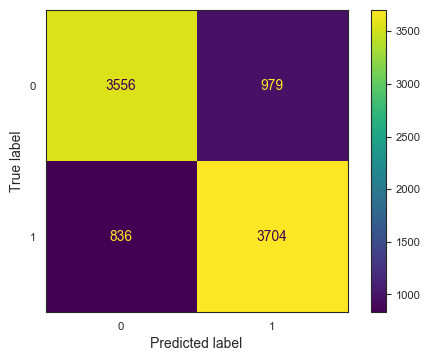

In [80]:
plot_confusion_matrix(dt, X_test, y_test);

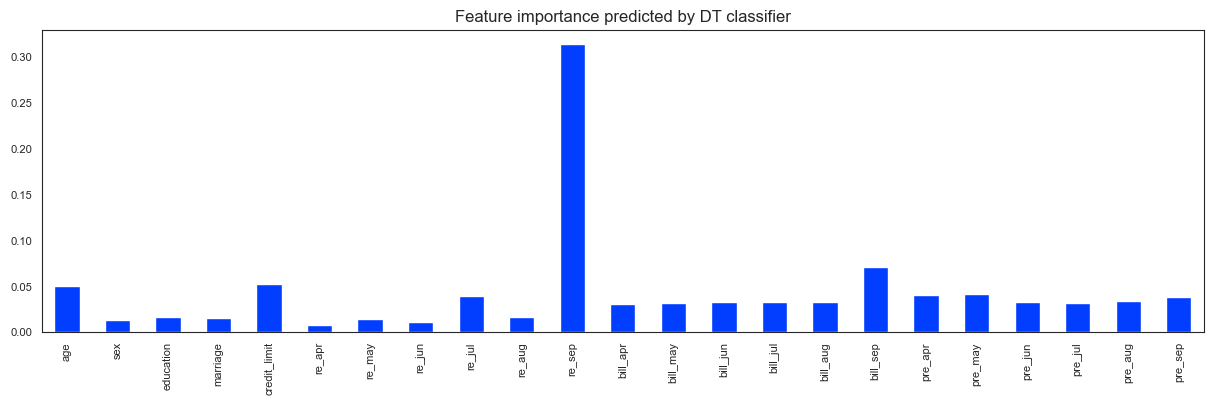

In [90]:
importance = pd.Series(dt.feature_importances_, index=features.columns.tolist())
importance.plot(kind='bar', figsize=(15,4))
plt.title("Feature importance predicted by DT classifier");

<a id='random-forest classifiers'></a>

### Random Forest Classifier

In [81]:
rf = RandomForestClassifier(random_state=94).fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# score
print("RF Train score: {:.3f}".format(rf.score(X_train, y_train)))
print("RF Test Score: {:.3f}".format(rf.score(X_test, y_test)))
print(" ")
print("RF Accuracy Score: {:.3f}".format(accuracy_score(y_test, rf_pred)))
print("RF F1 score: {:.3f}".format(f1_score(y_test, rf_pred)))
print(" ")
print("RF Precision Score: {:.3f}".format(precision_score(y_test, rf_pred)))
print("RF Recall Score: {:.3f}".format(recall_score(y_test, rf_pred)))

RF Train score: 0.999
RF Test Score: 0.867
 
RF Accuracy Score: 0.867
RF F1 score: 0.862
 
RF Precision Score: 0.894
RF Recall Score: 0.831


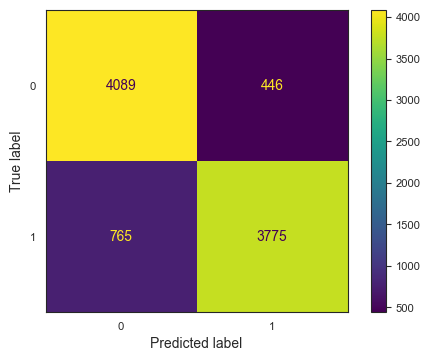

In [82]:
plot_confusion_matrix(rf, X_test, y_test)

In [83]:
# confusion matrix
confusion_matrix(y_test, rf_pred)

array([[4089,  446],
       [ 765, 3775]])

<a id='precision-recall-tradeoff'></a>

### Precision Recall Tradeoff

In [ ]:
param_grid = {
    'max_depth' : [80,100],
    'n_estimators':[93, 100],
    'random_state':[47,95],
    'max_features':[2,3,5]
}

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, scoring='roc_auc')
rf_search = grid_rf.fit(sampled_features, sampled_target)


In [85]:
rf = RandomForestClassifier(random_state=47, max_depth=80, n_estimators=95, max_features=3).fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [105]:
# score
print("RF Train score: {:.3f}".format(rf.score(X_train, y_train)))
print("RF Test Score: {:.3f}".format(rf.score(X_test, y_test)))
print(" ")
print("RF Accuracy Score: {:.3f}".format(accuracy_score(y_test, rf_pred)))
print("RF F1 score: {:.3f}".format(f1_score(y_test, rf_pred)))
print(" ")
print("RF Precision Score: {:.3f}".format(precision_score(y_test, rf_pred)))
print("RF Recall Score: {:.3f}".format(recall_score(y_test, rf_pred)))
print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, rf_pred)))

RF Train score: 0.999
RF Test Score: 0.868
 
RF Accuracy Score: 0.868
RF F1 score: 0.864
 
RF Precision Score: 0.893
RF Recall Score: 0.837
ROC AUC Score: 0.868


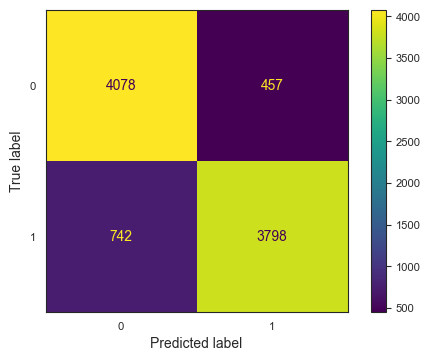

In [86]:
plot_confusion_matrix(rf, X_test, y_test);

In [100]:
rf_conf = confusion_matrix(y_test, rf_pred)
rf_conf[1,0]

742

In [104]:
probability_of_FN = (rf_conf[1,0]/y_test.shape[0])*100
round(probability_of_FN,2)


8.18

- If the model is predicting zero, means the person is most likely to return the money, then there's a 8.18 % probability that the person won't return the money.

- This probability is too small with an ROCAUC score of 86%.


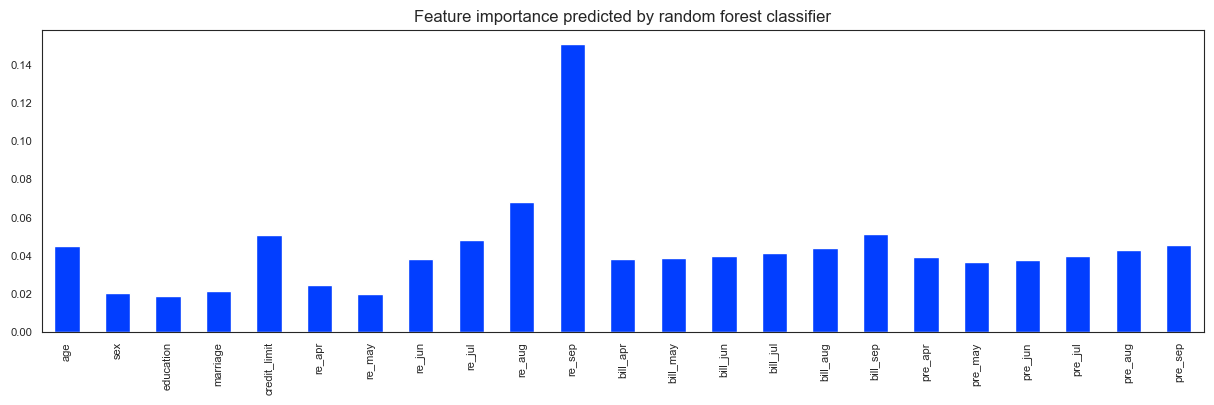

In [92]:
importance = pd.Series(rf.feature_importances_, index=features.columns.tolist())
importance.plot(kind='bar', figsize=(15,4))
plt.title("Feature importance predicted by random forest classifier");

<a id='conclusion'></a>

## Conclusion